In [1]:
#Importing the importtant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [3]:
#Importing data

In [4]:
df=pd.read_csv('breat_cancer.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Checking for null values

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#creating a duplicate of the given dataset

In [10]:
data=df

In [11]:
#Dropping unnamed column as it has no meaning

In [12]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#Using feature scaling to scale the variables as different variable are spanning with various range of values 

In [15]:
data.drop(['id'],axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data=pd.DataFrame(sc.fit_transform(data.drop(['diagnosis'],axis=1)),columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])


In [17]:
new_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
#this new_data contains all the columns except the id and diagnosis but diagnosis is our target variable so concatenating it

In [19]:
new_data['diagnosis']=data['diagnosis']

In [20]:
new_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


In [21]:
#Comparing the two classes of target variable

In [1]:
sns.countplot(new_data['diagnosis'])

NameError: name 'sns' is not defined

In [26]:
#Creating inputs for model application

In [27]:
X=new_data.drop(['diagnosis'],axis=1)
y=new_data['diagnosis']

In [28]:
#Splitting the data into training and testing datasets

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
#Creating empty variavbles for storing accuracy values of all the models

In [31]:
accuracy_train=[]
accuracy_test=[]
model=[]

In [32]:
#Using logistic Regression to fit the model and predict 

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [34]:
print("Accuracy score of training data using Logistic Regression : " ,accuracy_score(y_train,lr.predict(X_train)))
print("Accuracy score of testing data using Logistic Regression : " ,accuracy_score(y_test,y_pred_lr))
accuracy_train.append(accuracy_score(y_train,lr.predict(X_train)))
accuracy_test.append(accuracy_score(y_test,y_pred_lr))
model.append("Logistic Regression")

Accuracy score of training data using Logistic Regression :  0.9899497487437185
Accuracy score of testing data using Logistic Regression :  0.9766081871345029


In [35]:
#Using SVM

In [36]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [37]:
print("Accuracy score of training data using SVM : " ,accuracy_score(y_train,svm.predict(X_train)))
print("Accuracy score of testing data using SVM : " ,accuracy_score(y_test,y_pred_svm))
accuracy_train.append(accuracy_score(y_train,svm.predict(X_train)))
accuracy_test.append(accuracy_score(y_test,y_pred_svm))
model.append("SVM")

Accuracy score of training data using SVM :  0.9824120603015075
Accuracy score of testing data using SVM :  0.9766081871345029


In [38]:
#Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [40]:
print("Accuracy score of training data using Random Forest : " ,accuracy_score(y_train,rf.predict(X_train)))
print("Accuracy score testing data using Random Forest : " ,accuracy_score(y_test,y_pred_rf))
accuracy_train.append(accuracy_score(y_train,rf.predict(X_train)))
accuracy_test.append(accuracy_score(y_test,y_pred_rf))
model.append("Random Forest")

Accuracy score of training data using Random Forest :  1.0
Accuracy score testing data using Random Forest :  0.9590643274853801


In [41]:
#Using K-Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
def select_neighbors():
    knn_train=[]
    knn_test=[]
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        knn_train.append(accuracy_score(y_train,y_train_pred))
        knn_test.append(accuracy_score(y_test,y_test_pred))
        
    return knn_train,knn_test

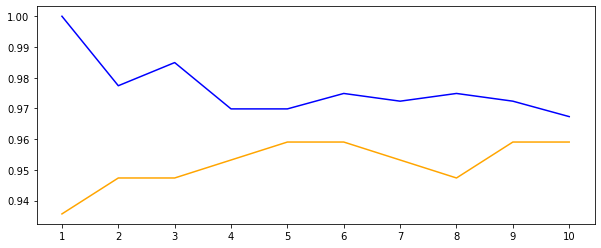

In [44]:
knn_train,knn_test = select_neighbors()
x = np.linspace(1,10,10)

plt.figure(figsize=(10,4))
plt.plot(x,knn_test,color='orange',label='Testing')
plt.plot(x,knn_train,color='blue',label='Training')
plt.xticks(x)
plt.show()


In [45]:
#Using n_neighbors=6 since it provides the better accuracy with testing and training dataset

In [46]:
knn=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("Accuracy score of traning data using KNN : " , accuracy_score(y_train,knn.predict(X_train)))
print("Accuracy score of testing data using KNN : " , accuracy_score(y_test,y_pred_knn))
accuracy_train.append((accuracy_score(y_train,knn.predict(X_train))))
accuracy_test.append(accuracy_score(y_test,y_pred_knn))
model.append("KNN")

Accuracy score of traning data using KNN :  0.9748743718592965
Accuracy score of testing data using KNN :  0.9590643274853801


In [47]:
#Visualizing the accuarcy values we obtained using different classification models

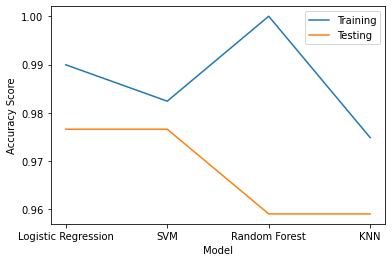

In [48]:
plt.plot(model,accuracy_train,label='Training')
plt.plot(model,accuracy_test,label='Testing')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.legend()

In [49]:
#From above graph we can conclude that logistic regression or svm would be a good choice to classify the problem
#We can also see that Random Forest fits the training dataset properly with accuracy score 1.0 , which highlights that it usually overfits the data.